In [2]:
import networkx as nx

# Create an empty graph
G = nx.Graph()

# Add locations (nodes) representing key points in the area
G.add_nodes_from([
    ("Entry Gate", {"pos": (20.2878, 85.8415)}),   # Entry Point
    ("Exit Gate", {"pos": (20.2889, 85.8421)}),    # Exit Point
    ("Stage", {"pos": (20.2883, 85.8418)}),        # Main Event Stage
    ("Food Court", {"pos": (20.2875, 85.8417)}),   # Food Stalls
    ("Parking", {"pos": (20.2869, 85.8412)}),      # Parking Area
])

# Add paths (edges) between locations
G.add_edges_from([
    ("Entry Gate", "Stage"),  
    ("Entry Gate", "Food Court"),
    ("Food Court", "Stage"),
    ("Stage", "Exit Gate"),
    ("Food Court", "Parking"),
    ("Parking", "Exit Gate"),
])

# Assign weights to paths (default distances, will be updated for congestion)
for u, v in G.edges():
    G[u][v]["weight"] = 10  # Default weight (can be changed based on congestion)


In [3]:
# Simulate congestion at the "Stage" area
G["Stage"]["Exit Gate"]["weight"] = 100  # Increased weight (heavy crowd)


In [4]:
from heapq import heappop, heappush

def a_star_search(graph, start, goal):
    """A* Pathfinding Algorithm to find the best route."""
    priority_queue = []
    heappush(priority_queue, (0, start))
    
    came_from = {start: None}
    cost_so_far = {start: 0}

    while priority_queue:
        _, current = heappop(priority_queue)

        if current == goal:
            break

        for neighbor in graph.neighbors(current):
            weight = graph[current][neighbor]["weight"]
            new_cost = cost_so_far[current] + weight

            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                heappush(priority_queue, (new_cost, neighbor))
                came_from[neighbor] = current

    return reconstruct_path(came_from, start, goal)

def reconstruct_path(came_from, start, goal):
    """Reconstruct shortest path"""
    current = goal
    path = []
    while current is not None:
        path.append(current)
        current = came_from[current]
    path.reverse()
    return path

# Compute best route avoiding congestion
best_route = a_star_search(G, "Entry Gate", "Exit Gate")
print("Best Route:", " → ".join(best_route))


Best Route: Entry Gate → Food Court → Parking → Exit Gate


In [5]:
import folium

# Create a folium map centered at Baliyatra Ground
event_map = folium.Map(location=[20.2878, 85.8415], zoom_start=16)

# Plot all paths
for u, v in G.edges():
    folium.PolyLine(
        [G.nodes[u]["pos"], G.nodes[v]["pos"]],
        color="gray", weight=2
    ).add_to(event_map)

# Plot congested roads in ORANGE
congested_paths = [("Stage", "Exit Gate")]  # Example: Main stage is crowded
for u, v in congested_paths:
    folium.PolyLine(
        [G.nodes[u]["pos"], G.nodes[v]["pos"]],
        color="orange", weight=4, tooltip="Heavy Traffic"
    ).add_to(event_map)

# Plot optimized best route in RED
route_coords = [G.nodes[node]["pos"] for node in best_route]
folium.PolyLine(route_coords, color="red", weight=4, tooltip="Best Route").add_to(event_map)

# Mark key locations
for node, data in G.nodes(data=True):
    folium.Marker(data["pos"], popup=node).add_to(event_map)

# Show map
event_map


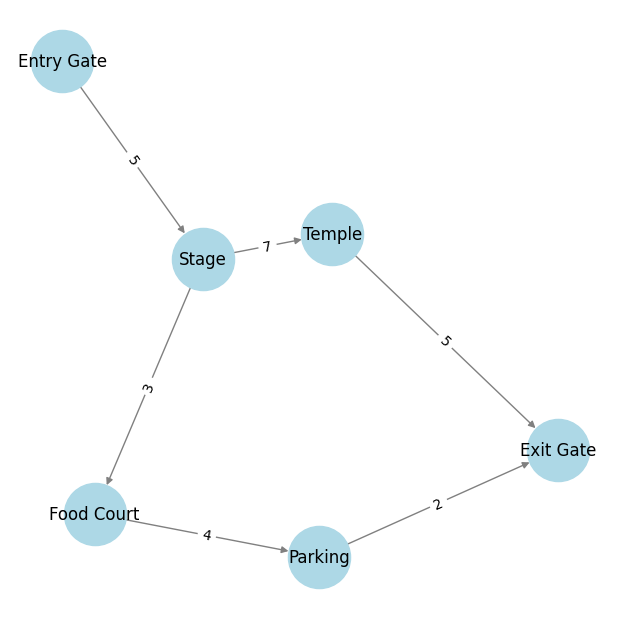

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes (places in the area)
G.add_nodes_from(["Entry Gate", "Exit Gate", "Stage", "Food Court", "Parking", "Temple"])

# Add edges with initial weights (distance or congestion level)
G.add_edges_from([
    ("Entry Gate", "Stage", {'weight': 5}),
    ("Stage", "Food Court", {'weight': 3}),
    ("Food Court", "Parking", {'weight': 4}),
    ("Parking", "Exit Gate", {'weight': 2}),
    ("Stage", "Temple", {'weight': 7}),
    ("Temple", "Exit Gate", {'weight': 5}),
])

# Draw the map
plt.figure(figsize=(6,6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


In [7]:
def update_weights(G, congestion_data):
    for edge, new_weight in congestion_data.items():
        if G.has_edge(*edge):
            G[edge[0]][edge[1]]['weight'] = new_weight


In [8]:
def find_best_route(G, start, end):
    return nx.shortest_path(G, source=start, target=end, weight='weight')

# Example usage
best_path = find_best_route(G, "Entry Gate", "Exit Gate")
print("Suggested Route:", best_path)


Suggested Route: ['Entry Gate', 'Stage', 'Food Court', 'Parking', 'Exit Gate']


In [9]:
!pip install networkx matplotlib numpy


Updated congestion level for route ('Food Court', 'Parking'): 25
Best Route from Stage to Parking: ['Stalls', 'Entrance', 'Food Court', 'Stage']


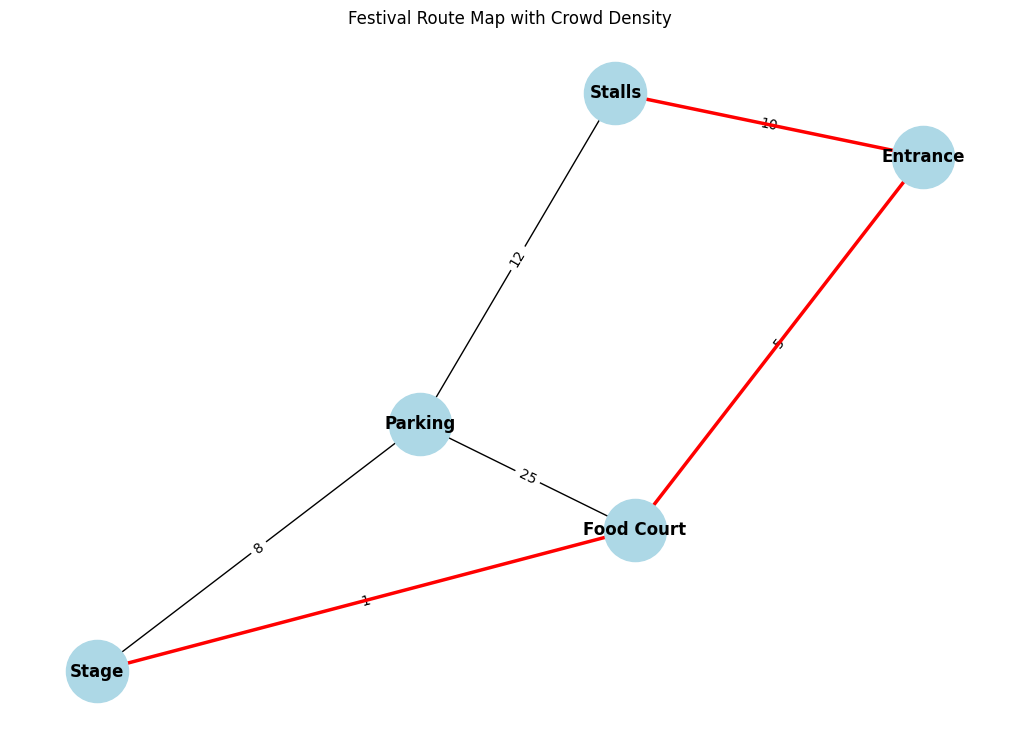

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

# 📌 Step 1: Define the Undirected Graph (Bidirectional Routes)
G = nx.Graph()

# 📌 Step 2: Add Routes as Nodes and Edges (Simulating a Festival Ground)
# Format: G.add_edge("Location1", "Location2", weight=CrowdDensity)
G.add_edge("Entrance", "Food Court", weight=5)
G.add_edge("Food Court", "Stage", weight=1)
G.add_edge("Stage", "Parking", weight=8)
G.add_edge("Food Court", "Parking", weight=1)
G.add_edge("Entrance", "Stalls", weight=10)
G.add_edge("Stalls", "Parking", weight=12)

# 📌 Step 3: Function to Update Congestion Levels Dynamically
def update_congestion(route, new_weight):
    if route in G.edges:
        G[route[0]][route[1]]['weight'] = new_weight
        print(f"Updated congestion level for route {route}: {new_weight}")

# 📌 Step 4: Function to Find Best Route Based on Crowd Density
def find_best_route(start, end):
    path = nx.shortest_path(G, source=start, target=end, weight="weight")
    return path

# 📌 Step 5: Function to Visualize the Map with Congestion
def visualize_map(path=None):
    plt.figure(figsize=(10, 7))

    pos = nx.spring_layout(G, seed=42)  # Positioning for visualization
    edge_labels = nx.get_edge_attributes(G, "weight")

    # Draw Graph
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=12, font_weight="bold")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

    # Highlight best path
    if path:
        path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="red", width=2.5)

    plt.title("Festival Route Map with Crowd Density")
    plt.show()

# 📌 Step 6: Example Usage (Updating Congestion and Finding Optimal Route)
update_congestion(("Food Court", "Parking"), 25)  # Simulate high congestion
best_route = find_best_route("Stalls", "Stage")
print(f"Best Route from Stage to Parking: {best_route}")

# 📌 Step 7: Visualize the Graph with Updated Congestion & Best Route
visualize_map(best_route)


In [20]:
print("Trying better visualizaton")

Trying better visualizaton


In [21]:
import networkx as nx
import folium

# 📌 Step 1: Define the Graph with Realistic Locations (Lat, Lon)
G = nx.Graph()

# Define locations with GPS coordinates (simulating festival routes)
locations = {
    "Entrance": (20.3039, 85.8334),
    "Food Court": (20.3045, 85.8340),
    "Stage": (20.3050, 85.8345),
    "Parking": (20.3060, 85.8350),
    "Stalls": (20.3042, 85.8338)
}

# 📌 Step 2: Add Edges (Routes) with Congestion Levels as Weights
G.add_edge("Entrance", "Food Court", weight=5)
G.add_edge("Food Court", "Stage", weight=15)
G.add_edge("Stage", "Parking", weight=8)
G.add_edge("Food Court", "Parking", weight=20)
G.add_edge("Entrance", "Stalls", weight=10)
G.add_edge("Stalls", "Parking", weight=12)

# 📌 Step 3: Function to Update Congestion Levels
def update_congestion(route, new_weight):
    if route in G.edges:
        G[route[0]][route[1]]['weight'] = new_weight
        print(f"Updated congestion level for route {route}: {new_weight}")

# 📌 Step 4: Function to Find Best Route
def find_best_route(start, end):
    return nx.shortest_path(G, source=start, target=end, weight="weight")

# 📌 Step 5: Function to Visualize on a Google Maps-like Interface
def visualize_map(path=None):
    # Initialize the map centered around the festival area
    festival_map = folium.Map(location=[20.3045, 85.8340], zoom_start=16)

    # Draw all edges (routes) with color based on congestion level
    for edge in G.edges(data=True):
        loc1, loc2, congestion = edge[0], edge[1], edge[2]["weight"]
        color = "red" if congestion > 15 else "orange" if congestion > 10 else "green"
        
        # Draw route on map
        folium.PolyLine([locations[loc1], locations[loc2]], color=color, weight=5, tooltip=f"Congestion: {congestion}").add_to(festival_map)

    # Highlight best route
    if path:
        for i in range(len(path) - 1):
            folium.PolyLine([locations[path[i]], locations[path[i + 1]]], color="blue", weight=7, tooltip="Best Route").add_to(festival_map)

    # Add markers for all locations
    for place, coords in locations.items():
        folium.Marker(coords, popup=place, tooltip=place, icon=folium.Icon(color="blue")).add_to(festival_map)

    # Show the map
    return festival_map

# 📌 Step 6: Example - Update Congestion & Find Best Route
update_congestion(("Food Court", "Parking"), 25)  # Simulate high congestion
best_route = find_best_route("Stage", "Parking")
print(f"Best Route from Stage to Parking: {best_route}")

# 📌 Step 7: Display Interactive Map
visualize_map(best_route)


Updated congestion level for route ('Food Court', 'Parking'): 25
Best Route from Stage to Parking: ['Stage', 'Parking']


In [1]:
print("Attempt 2")

Attempt 2


In [2]:
pip install networkx matplotlib


Note: you may need to restart the kernel to use updated packages.


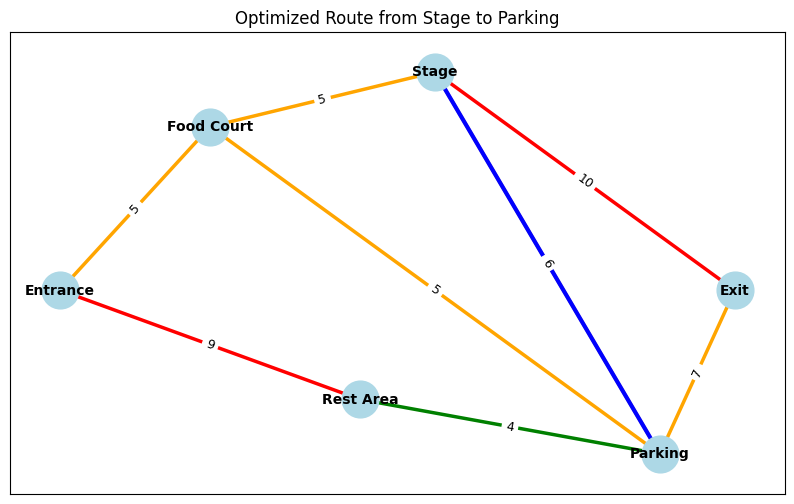

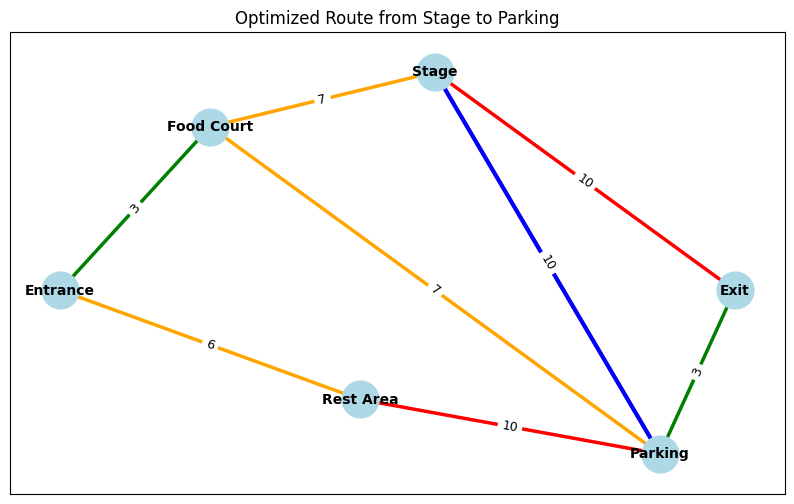

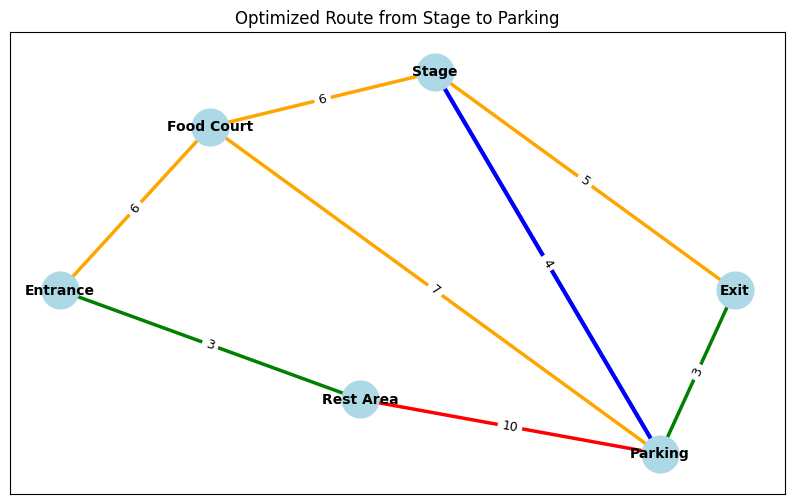

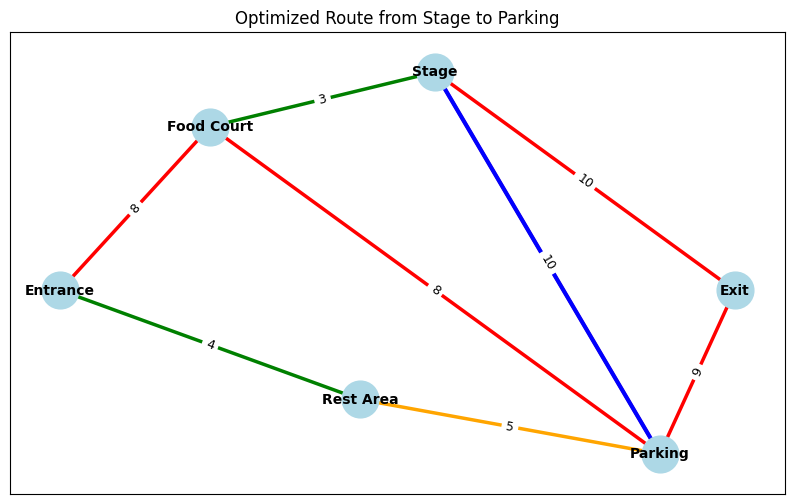

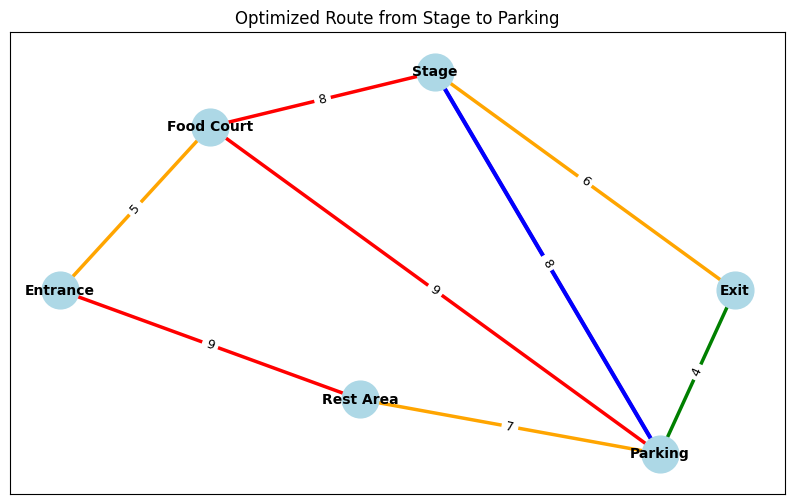

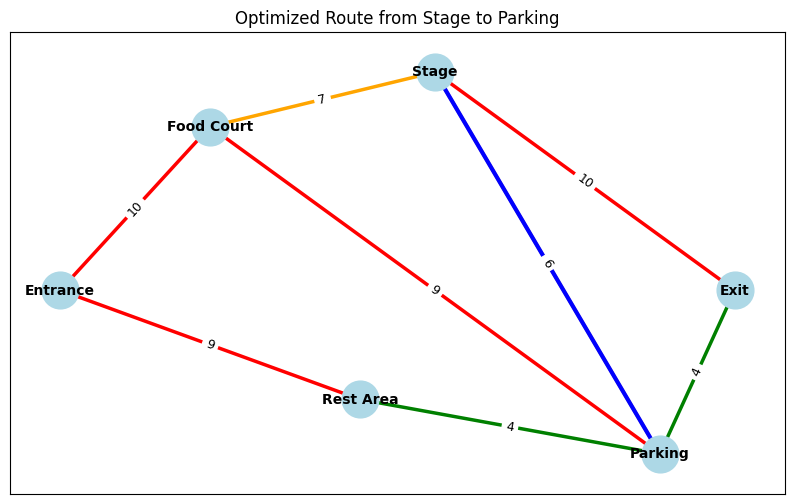

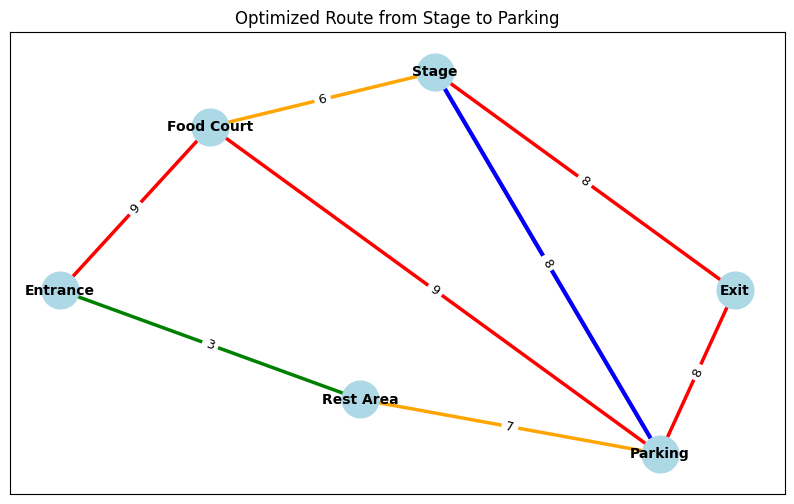

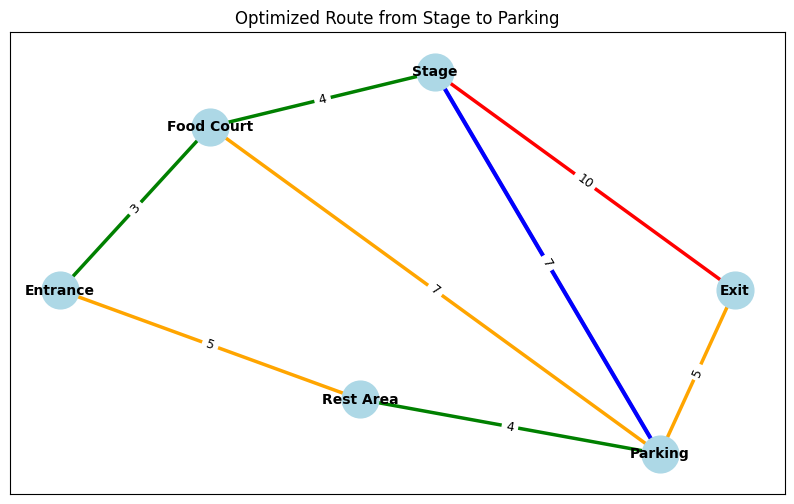

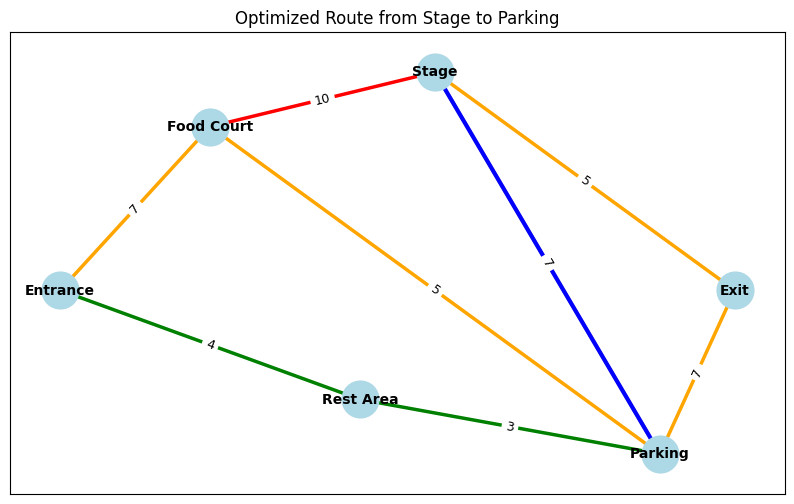

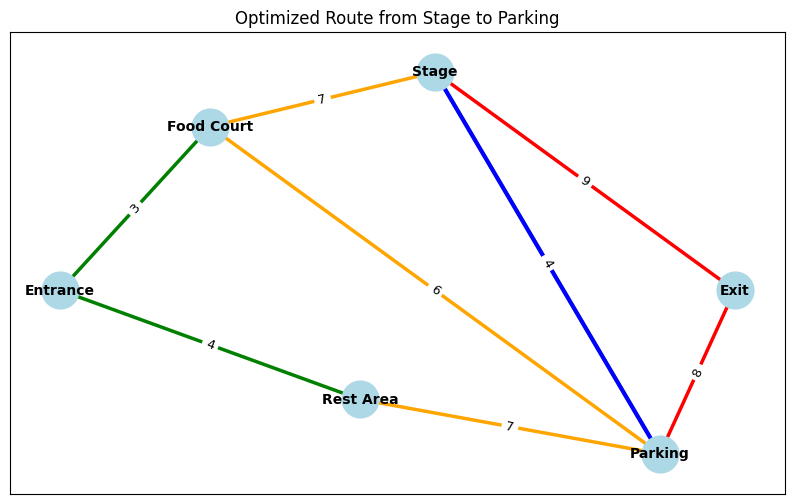

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import time

# Define locations (nodes) in the map
locations = {
    "Entrance": (1, 5),
    "Food Court": (3, 8),
    "Stage": (6, 9),
    "Parking": (9, 2),
    "Exit": (10, 5),
    "Rest Area": (5, 3)
}

# Define routes (edges) with initial congestion levels (weights)
routes = {
    ("Entrance", "Food Court"): 5,
    ("Entrance", "Rest Area"): 3,
    ("Food Court", "Stage"): 6,
    ("Food Court", "Parking"): 8,
    ("Stage", "Parking"): 5,
    ("Rest Area", "Parking"): 4,
    ("Parking", "Exit"): 7,
    ("Stage", "Exit"): 6
}

# Create a graph
G = nx.Graph()  # Change to nx.DiGraph() for directed graph

# Add nodes to graph
for location, pos in locations.items():
    G.add_node(location, pos=pos)

# Add edges with initial weights
for (loc1, loc2), weight in routes.items():
    G.add_edge(loc1, loc2, weight=weight)

# Function to draw the map
def draw_map(start, end):
    plt.figure(figsize=(10, 6))
    pos = nx.get_node_attributes(G, 'pos')

    # Get shortest path
    shortest_path = nx.shortest_path(G, source=start, target=end, weight='weight')

    # Draw all edges
    for edge in G.edges():
        congestion_level = G[edge[0]][edge[1]]['weight']
        color = "green" if congestion_level <= 4 else "orange" if congestion_level <= 7 else "red"
        nx.draw_networkx_edges(G, pos, edgelist=[edge], width=2.5, edge_color=color)

    # Draw shortest path in blue
    path_edges = list(zip(shortest_path, shortest_path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=3, edge_color="blue")

    # Draw nodes and labels
    nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=700)
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

    # Display congestion levels
    edge_labels = {(u, v): f"{G[u][v]['weight']}" for u, v in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

    plt.title(f"Optimized Route from {start} to {end}")
    plt.show()

# Function to simulate dynamic congestion updates
def simulate_congestion(start, end, iterations=10, delay=2):
    for _ in range(iterations):
        # Randomly update congestion values
        for edge in G.edges():
            G[edge[0]][edge[1]]['weight'] = random.randint(3, 10)  # Simulating congestion changes

        # Redraw the map with updated congestion
        draw_map(start, end)
        
        time.sleep(delay)  # Wait for the next update

# Run the simulation
start_location = "Stage"
end_location = "Parking"
simulate_congestion(start_location, end_location)


In [2]:
pip install folium networkx


Note: you may need to restart the kernel to use updated packages.


In [2]:
import folium
import networkx as nx
import random
import time
from IPython.display import display, clear_output

# Define locations (latitude, longitude for real-world mapping)
locations = {
    "Entrance": (20.2851, 85.8334),
    "Food Court": (20.2855, 85.8340),
    "Stage": (20.2860, 85.8348),
    "Parking": (20.2845, 85.8325),
    "Exit": (20.2858, 85.8318),
    "Rest Area": (20.2848, 85.8338)
}

# Define routes (edges) with initial congestion levels (weights)
routes = {
    ("Entrance", "Food Court"): 5,
    ("Entrance", "Rest Area"): 3,
    ("Food Court", "Stage"): 6,
    ("Food Court", "Parking"): 8,
    ("Stage", "Parking"): 5,
    ("Rest Area", "Parking"): 4,
    ("Parking", "Exit"): 7,
    ("Stage", "Exit"): 6
}

# Create a graph
G = nx.Graph()  

# Add nodes to graph
for location in locations.keys():
    G.add_node(location, pos=locations[location])

# Add edges with initial weights
for (loc1, loc2), weight in routes.items():
    G.add_edge(loc1, loc2, weight=weight)

# Function to draw and display map
def draw_map(start, end):
    clear_output(wait=True)  # Clears previous map output in Jupyter Notebook
    m = folium.Map(location=[20.2851, 85.8334], zoom_start=17)

    # Get shortest path
    shortest_path = nx.shortest_path(G, source=start, target=end, weight='weight')

    # Draw edges (routes) with color based on congestion
    for edge in G.edges():
        congestion_level = G[edge[0]][edge[1]]['weight']
        color = "green" if congestion_level <= 4 else "orange" if congestion_level <= 7 else "red"

        folium.PolyLine(
            [locations[edge[0]], locations[edge[1]]], 
            color=color, weight=5, opacity=0.8
        ).add_to(m)

    # Highlight shortest path in **blue**
    path_edges = list(zip(shortest_path, shortest_path[1:]))
    for edge in path_edges:
        folium.PolyLine(
            [locations[edge[0]], locations[edge[1]]], 
            color="blue", weight=6, opacity=1
        ).add_to(m)

    # Add markers for each location
    for loc, coord in locations.items():
        folium.Marker(coord, tooltip=loc, popup=loc).add_to(m)

    # Display the map
    display(m)

# Function to simulate congestion updates dynamically
def simulate_congestion(start, end, iterations=10, delay=3):
    for _ in range(iterations):
        # Update congestion values randomly
        for edge in G.edges():
            G[edge[0]][edge[1]]['weight'] = random.randint(3, 10)  

        # Re-draw the map with updated congestion
        draw_map(start, end)
        
        time.sleep(delay)  # Pause before updating congestion again

# Run the simulation
start_location = "Stage"
end_location = "Parking"
simulate_congestion(start_location, end_location)


In [3]:
print("Places are marked")

Places are marked


In [5]:
import folium
import networkx as nx
import random
import time
from IPython.display import display, clear_output
from folium.plugins import MarkerCluster

# Define locations (latitude, longitude for real-world mapping)
locations = {
    "Entrance": (20.2851, 85.8334),
    "Food Court": (20.2855, 85.8340),
    "Stage": (20.2860, 85.8348),
    "Parking": (20.2845, 85.8325),
    "Exit": (20.2858, 85.8318),
    "Rest Area": (20.2848, 85.8338)
}

# Define routes (edges) with initial congestion levels (weights)
routes = {
    ("Entrance", "Food Court"): 5,
    ("Entrance", "Rest Area"): 3,
    ("Food Court", "Stage"): 6,
    ("Food Court", "Parking"): 8,
    ("Stage", "Parking"): 5,
    ("Rest Area", "Parking"): 4,
    ("Parking", "Exit"): 7,
    ("Stage", "Exit"): 6
}

# Create a graph
G = nx.Graph()

# Add nodes to graph
for location in locations.keys():
    G.add_node(location, pos=locations[location])

# Add edges with initial weights
for (loc1, loc2), weight in routes.items():
    G.add_edge(loc1, loc2, weight=weight)

# Function to draw and display map with place names
def draw_map(start, end):
    clear_output(wait=True)  # Clears previous map output in Jupyter Notebook
    m = folium.Map(location=[20.2851, 85.8334], zoom_start=17)

    # Get shortest path
    shortest_path = nx.shortest_path(G, source=start, target=end, weight='weight')

    # Draw edges (routes) with color based on congestion
    for edge in G.edges():
        congestion_level = G[edge[0]][edge[1]]['weight']
        color = "green" if congestion_level <= 4 else "orange" if congestion_level <= 7 else "red"

        folium.PolyLine(
            [locations[edge[0]], locations[edge[1]]], 
            color=color, weight=5, opacity=0.8
        ).add_to(m)

    # Highlight shortest path in **blue**
    path_edges = list(zip(shortest_path, shortest_path[1:]))
    for edge in path_edges:
        folium.PolyLine(
            [locations[edge[0]], locations[edge[1]]], 
            color="blue", weight=6, opacity=1
        ).add_to(m)

    # Add markers and place names as always-visible labels
    for loc, coord in locations.items():
        folium.Marker(
            coord, 
            icon=folium.DivIcon(html=f'<div style="font-size: 12px; color: black;"><b>{loc}</b></div>')  
        ).add_to(m)

    # Display the map
    display(m)

# Function to simulate congestion updates dynamically
def simulate_congestion(start, end, iterations=10, delay=3):
    for _ in range(iterations):
        # Update congestion values randomly
        for edge in G.edges():
            G[edge[0]][edge[1]]['weight'] = random.randint(3, 10)  

        # Re-draw the map with updated congestion
        draw_map(start, end)
        
        time.sleep(delay)  # Pause before updating congestion again

# Run the simulation
start_location = "Stage"
end_location = "Parking"
simulate_congestion(start_location, end_location)


In [2]:
!pip install --upgrade osmnx


In [2]:
!pip install folium osmnx networkx


In [16]:
import osmnx as ox
import networkx as nx
import folium
import time
from IPython.display import clear_output, display

# Define locations
locations = {
    "Parking": (20.293262, 85.845255),
    "Food Court": (20.289875, 85.845734),
    "Stage": (20.292031, 85.850332),
    "Exit": (20.293573, 85.847616),
    "Entry": (20.287361, 85.851666)
}

# Load map with real roads
G = ox.graph_from_point((20.2910, 85.8470), dist=1000, network_type="drive")
G = nx.Graph(G)  # Convert to undirected

# Get nearest nodes
node_locations = {loc: ox.distance.nearest_nodes(G, coord[1], coord[0]) for loc, coord in locations.items()}

# Initial congestion data (Random values for demo)
congestion_data = {
    ("Entry", "Food Court"): 5,
    ("Food Court", "Stage"): 10,
    ("Stage", "Parking"): 15,
    ("Parking", "Exit"): 8,
    ("Exit", "Entry"): 3,
    ("Food Court", "Parking"): 6,
    ("Stage", "Exit"): 12
}

# Function to get color based on congestion level
def get_congestion_color(weight):
    if weight < 5:
        return "green"
    elif weight < 10:
        return "orange"
    else:
        return "red"

# Function to update and display the map
def update_map(congestion_data):
    m = folium.Map(location=[20.2910, 85.8470], zoom_start=15)  # Use folium map

    # Add location markers
    for loc, coord in locations.items():
        folium.Marker(coord, popup=loc, icon=folium.Icon(color="blue")).add_to(m)

    # Draw congestion routes on actual roads
    for (start, end), weight in congestion_data.items():
        try:
            route = nx.shortest_path(G, node_locations[start], node_locations[end], weight="length")
            color = get_congestion_color(weight)
            path_coords = [(G.nodes[node]["y"], G.nodes[node]["x"]) for node in route]
            folium.PolyLine(path_coords, color=color, weight=6, opacity=0.8).add_to(m)
        except Exception as e:
            print(f"Error in path {start} -> {end}: {e}")

    return m

# Simulate congestion updates
for i in range(10):
    clear_output(wait=True)
    print(f"Iteration {i+1}/10: Updating congestion data...")

    # Random congestion fluctuations
    for key in congestion_data.keys():
        congestion_data[key] = max(1, min(15, congestion_data[key] + (2 * (-1) ** i)))

    # Display updated map
    display(update_map(congestion_data))
    time.sleep(3)


Iteration 10/10: Updating congestion data...


In [17]:
print("Adding names to the maps")

Adding names to the maps


In [25]:
import osmnx as ox
import networkx as nx
import folium
import time
from IPython.display import clear_output, display

# Define locations
locations = {
    "Parking": (20.293262, 85.845255),
    "Food Court": (20.289875, 85.845734),
    "Stage": (20.292031, 85.850332),
    "Exit": (20.293573, 85.847616),
    "Entry": (20.287361, 85.851666)
}

# Load map with real roads
G = ox.graph_from_point((20.2910, 85.8470), dist=1000, network_type="drive")
G = nx.Graph(G)  # Convert to undirected

# Get nearest nodes
node_locations = {loc: ox.distance.nearest_nodes(G, coord[1], coord[0]) for loc, coord in locations.items()}

# Initial congestion data
congestion_data = {
    ("Entry", "Food Court"): 5,
    ("Food Court", "Stage"): 10,
    ("Stage", "Parking"): 1,
    ("Parking", "Exit"): 8,
    ("Exit", "Entry"): 3,
    ("Food Court", "Parking"): 6,
    ("Stage", "Exit"): 12
}

# Function to get color based on congestion level
def get_congestion_color(weight):
    if weight < 5:
        return "green"
    elif weight < 10:
        return "orange"
    else:
        return "red"

# Function to update and display the map
def update_map(congestion_data):
    m = folium.Map(location=[20.2910, 85.8470], zoom_start=15)  # Use folium map

    # Add location markers with labels
    for loc, coord in locations.items():
        folium.Marker(coord, popup=loc, icon=folium.Icon(color="blue")).add_to(m)
        
        # Add labels for locations (names will always be visible)
        folium.Marker(
            location=coord,
            icon=folium.DivIcon(html=f'<div style="font-size: 14px; font-weight: bold; color: black;">{loc}</div>')
        ).add_to(m)

    # Draw congestion routes on actual roads
    for (start, end), weight in congestion_data.items():
        try:
            route = nx.shortest_path(G, node_locations[start], node_locations[end], weight="length")
            color = get_congestion_color(weight)
            path_coords = [(G.nodes[node]["y"], G.nodes[node]["x"]) for node in route]
            folium.PolyLine(path_coords, color=color, weight=6, opacity=0.8).add_to(m)
        except Exception as e:
            print(f"Error in path {start} -> {end}: {e}")

    return m

for i in range(10):
    clear_output(wait=True)
    print(f"Iteration {i+1}/10: Updating congestion data...")

    for key in congestion_data.keys():
        congestion_data[key] = max(1, min(15, congestion_data[key] + (2 * (-1) ** i)))

    display(update_map(congestion_data))
    time.sleep(3)


Iteration 10/10: Updating congestion data...


In [24]:
import osmnx as ox
import networkx as nx
import folium
import time
import random
from IPython.display import clear_output, display

# Define locations
locations = {
    "Parking": (20.293262, 85.845255),
    "Food Court": (20.289875, 85.845734),
    "Stage": (20.292031, 85.850332),
    "Exit": (20.293573, 85.847616),
    "Entry": (20.287361, 85.851666)
}

# Load map with real roads
G = ox.graph_from_point((20.2910, 85.8470), dist=1000, network_type="drive")
G = nx.Graph(G)  # Convert to undirected

# Get nearest nodes
node_locations = {loc: ox.distance.nearest_nodes(G, coord[1], coord[0]) for loc, coord in locations.items()}

# Initial congestion data
congestion_data = {
    ("Entry", "Food Court"): 5,
    ("Food Court", "Stage"): 5,
    ("Stage", "Parking"): 5,
    ("Parking", "Exit"): 5,
    ("Exit", "Entry"): 5,
    ("Food Court", "Parking"): 5,
    ("Stage", "Exit"): 5
}

# Function to get color based on congestion level
def get_congestion_color(weight):
    if weight < 5:
        return "green"
    elif weight < 10:
        return "orange"
    else:
        return "red"

# Function to update and display the map
def update_map(congestion_data):
    m = folium.Map(location=[20.2910, 85.8470], zoom_start=15)

    # Add location markers with labels
    for loc, coord in locations.items():
        folium.Marker(coord, popup=loc, icon=folium.Icon(color="blue")).add_to(m)
        folium.Marker(
            location=coord,
            icon=folium.DivIcon(html=f'<div style="font-size: 14px; font-weight: bold; color: black;">{loc}</div>')
        ).add_to(m)

    # Draw congestion routes on actual roads
    for (start, end), weight in congestion_data.items():
        try:
            route = nx.shortest_path(G, node_locations[start], node_locations[end], weight="length")
            color = get_congestion_color(weight)
            path_coords = [(G.nodes[node]["y"], G.nodes[node]["x"]) for node in route]
            folium.PolyLine(path_coords, color=color, weight=6, opacity=0.8).add_to(m)
        except Exception as e:
            print(f"Error in path {start} -> {end}: {e}")

    return m

# Simulate congestion updates with uniform distribution
for i in range(10):
    clear_output(wait=True)
    print(f"Iteration {i+1}/10: Updating congestion data...")

    # Select a random subset of roads to update in each iteration
    roads_to_update = random.sample(list(congestion_data.keys()), k=len(congestion_data) // 2)

    for key in roads_to_update:
        congestion_data[key] = max(1, min(15, congestion_data[key] + random.randint(-3, 3)))

    # Display updated map
    display(update_map(congestion_data))
    time.sleep(3)


Iteration 10/10: Updating congestion data...
